# Test the tfrecord and provider for ICDAR_test (latest)

In [1]:
# Transform the images and ground truth file into tfrecord
# Use slim to write the provider
# Use slim provider to load the data
import tensorflow as tf
import sys
sys.path.insert(0,'/Users/kiyoshi/Desktop/Research/LAB/FirstAccessment/2ndPaper/Textbox-Tensor/')
from datasets_test import ICDAR2013_Provider
import skimage.io as skio
import cv2
import numpy as np
#tf._version_
slim = tf.contrib.slim

file_path: /Users/kiyoshi/Desktop/Research/LAB/FirstAccessment/2ndPaper/Textbox-Tensor/datasets_test/*.tfrecord


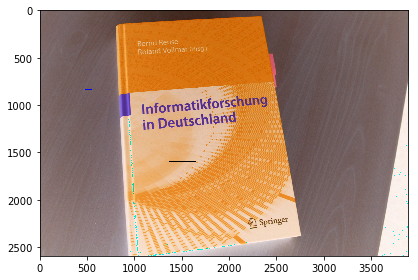

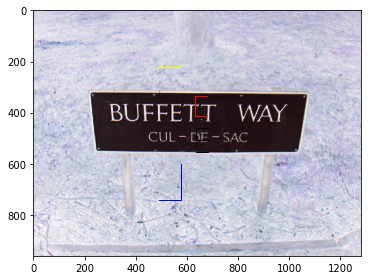

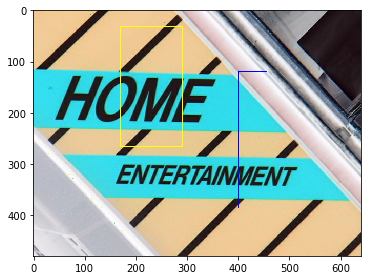

In [15]:
with tf.Graph().as_default():
    dataset = ICDAR2013_Provider.get_datasets('/Users/kiyoshi/Desktop/Research/LAB/FirstAccessment/2ndPaper/Textbox-Tensor/datasets_test/',file_pattern='*.tfrecord')

    data_provider = slim.dataset_data_provider.DatasetDataProvider(dataset, common_queue_capacity=32, common_queue_min=2)

    [image, shape, glabels, gbboxes,height,width] = \
    data_provider.get(['image', 'shape',
                    'object/label',
                    'object/bbox','height','width'])
    
    image = tf.cast(image, tf.float32) 
    bbox_image = tf.image.draw_bounding_boxes(tf.expand_dims(image,0), tf.expand_dims(gbboxes,0))
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        with slim.queues.QueueRunners(sess):
            for i in xrange(3):
                img, shape_, glabels_, bbox_,bbox_image_ = \
                sess.run([image, shape, glabels, gbboxes,bbox_image])
                skio.imshow(np.uint8(bbox_image_[0,:,:,:])*255)
                skio.show()